## Experiment 13
Applying **transforms.Grayscale()** to Dataset
```
CNN(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=3200, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=4, bias=True)
  )
)

```

### Accuracy: 89.272 %

In [1]:
#!pip uninstall -y numpy
#!pip install --force-reinstall numpy==1.19.3

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

In [5]:
dataset_dir = os.path.abspath('dataset_kagle/COVID-19_Radiography_Dataset')
dest_dir = os.path.abspath('dataset')

train_dir, test_dir, val_dir = utils.split_dataset(dataset_dir, dest_dir, test_ratio=0.2, val_ratio=0.1)

Ya existen datos de train, test y val.


In [6]:
batch_size = 64

transformers = transforms.Compose([
  transforms.Grayscale(num_output_channels=1), # returned image is single channel
  transforms.ToTensor(), # transform.ToTensor() will make the pixel values to be between [0, 1]
])

train_set =  torchvision.datasets.ImageFolder(train_dir, transformers)
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, pin_memory=True)
print(train_set)

test_set =  torchvision.datasets.ImageFolder(test_dir, transformers)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True, pin_memory=True)
print(test_set)

val_set =  torchvision.datasets.ImageFolder(val_dir, transformers)
val_loader = torch.utils.data.DataLoader(dataset=val_set, batch_size=batch_size, shuffle=True, pin_memory=True)
print(val_set)

Dataset ImageFolder
    Number of datapoints: 14814
    Root location: /content/dataset/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 4232
    Root location: /content/dataset/test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 2119
    Root location: /content/dataset/val
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
           )


In [7]:
tensor_img, label_idx = train_set[0]
#utils.show_img(tensor_img, train_set.classes[label_idx])

### Capa 1:

In [8]:
print('****************** Info Layer 1 **************************')
layer1_in_channels, layer1_img_width, layer1_img_height = tensor_img.shape
print("Dimensiones de entrada:", layer1_img_width, "x", layer1_img_height)
print("Número de canales de entrada:", layer1_in_channels)

layer1_num_filters = 32
print("Número de filtros:", layer1_num_filters)

layer1_kernel_size = 3
print("Dimensiones del kernel:", layer1_kernel_size, "x", layer1_kernel_size)

layer1_stride = 2
print("Tamaño de Stride:", layer1_stride)

layer1_padding = 1
print("Tamaño de Padding:", layer1_padding)

layer1_out_size = utils.size_output_layer(layer1_img_width, layer1_kernel_size, layer1_stride, layer1_padding)
print("Dimensiones de salida:", layer1_out_size, "x", layer1_out_size)

layer1_output_dim = utils.size_output_layer(layer1_out_size, 2, 2, 0)
print("Dimensiones luego del MaxPool2d:", layer1_output_dim)

****************** Info Layer 1 **************************
Dimensiones de entrada: 299 x 299
Número de canales de entrada: 1
Número de filtros: 32
Dimensiones del kernel: 3 x 3
Tamaño de Stride: 2
Tamaño de Padding: 1
Dimensiones de salida: 150 x 150
Dimensiones luego del MaxPool2d: 75


In [9]:
layer1_conv = nn.Conv2d(
        layer1_in_channels,
        layer1_num_filters,
        layer1_kernel_size,
        layer1_stride,
        layer1_padding
)

### Capa 2

In [10]:
print('****************** Info Layer 2 **************************')
layer2_in_channels, layer2_img_width, layer2_img_height = layer1_num_filters, layer1_output_dim, layer1_output_dim
print("Dimensiones de entrada:", layer2_img_width, "x", layer2_img_height)
print("Número de canales de entrada:", layer2_in_channels)

layer2_num_filters = 64
print("Número de filtros:", layer2_num_filters)

layer2_kernel_size = 2
print("Dimensiones del kernel:", layer2_kernel_size, "x", layer2_kernel_size)

layer2_stride = 2
print("Tamaño de Stride:", layer2_stride)

layer2_padding = 1
print("Tamaño de Padding:", layer2_padding)

layer2_out_size = utils.size_output_layer(layer2_img_width, layer2_kernel_size, layer2_stride, layer2_padding)
print("Dimensiones de salida:", layer2_out_size, "x", layer2_out_size)

layer2_output_dim = utils.size_output_layer(layer2_out_size, 2, 2, 0)
print("Dimensiones luego del MaxPool2d:", layer2_output_dim)

****************** Info Layer 2 **************************
Dimensiones de entrada: 75 x 75
Número de canales de entrada: 32
Número de filtros: 64
Dimensiones del kernel: 2 x 2
Tamaño de Stride: 2
Tamaño de Padding: 1
Dimensiones de salida: 38 x 38
Dimensiones luego del MaxPool2d: 19


In [11]:
layer2_conv = nn.Conv2d(
        layer2_in_channels,
        layer2_num_filters,
        layer2_kernel_size,
        layer2_stride,
        layer2_padding
)

### Capa 3

In [12]:
print('****************** Info Layer 2 **************************')
layer3_in_channels, layer3_img_width, layer3_img_height = layer2_num_filters, layer2_output_dim, layer2_output_dim
print("Dimensiones de entrada:", layer3_img_width, "x", layer3_img_height)
print("Número de canales de entrada:", layer3_in_channels)

layer3_num_filters = 128
print("Número de filtros:", layer3_num_filters)

layer3_kernel_size = 2
print("Dimensiones del kernel:", layer3_kernel_size, "x", layer3_kernel_size)

layer3_stride = 2
print("Tamaño de Stride:", layer3_stride)

layer3_padding = 1
print("Tamaño de Padding:", layer3_padding)

layer3_out_size = utils.size_output_layer(layer3_img_width, layer3_kernel_size, layer3_stride, layer3_padding)
print("Dimensiones de salida:", layer3_out_size, "x", layer3_out_size)

layer3_output_dim = utils.size_output_layer(layer3_out_size, 2, 2, 0)
print("Dimensiones luego del MaxPool2d:", layer3_output_dim)

****************** Info Layer 2 **************************
Dimensiones de entrada: 19 x 19
Número de canales de entrada: 64
Número de filtros: 128
Dimensiones del kernel: 2 x 2
Tamaño de Stride: 2
Tamaño de Padding: 1
Dimensiones de salida: 10 x 10
Dimensiones luego del MaxPool2d: 5


In [13]:
layer3_conv = nn.Conv2d(
        layer3_in_channels,
        layer3_num_filters,
        layer3_kernel_size,
        layer3_stride,
        layer3_padding
)

### Model

In [14]:
# Layer 1: Convolutional layer
layer1 = nn.Sequential(
    layer1_conv,
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.BatchNorm2d(layer1_num_filters),
)
print(layer1)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [15]:
# Layer 2: Convolutional layer
layer2 = nn.Sequential(
    layer2_conv,
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.BatchNorm2d(layer2_num_filters),
)
print(layer2)

Sequential(
  (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [16]:
# Layer 3: Convolutional layer
layer3 = nn.Sequential(
    layer3_conv,
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.BatchNorm2d(layer3_num_filters),
)
print(layer3)

Sequential(
  (0): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [17]:
# Layer 4: Linear Classifier
num_classes = 4
initial_in_features = layer3_output_dim * layer3_output_dim * layer3_num_filters
classifier = nn.Sequential(
    nn.Linear(in_features=initial_in_features, out_features=1024),
    nn.ReLU(),
    nn.Linear(in_features=1024, out_features=512),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=num_classes)
)
print(classifier)

Sequential(
  (0): Linear(in_features=3200, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=4, bias=True)
)


In [18]:
model = utils.CNN()

model.addLayer(layer1)
model.addLayer(layer2)
model.addLayer(layer3)

model.addClassifier(classifier)

print(model)

# Optimizer
learning_rate =  0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


CNN(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=3200, out_features=10

### Training

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
# list_loss = []
# t_list_loss = []
# v_list_loss = []
# list_time = []
# j=0
# total_steps = len(train_loader)

train_losses=[]
train_accu=[]

eval_losses=[]
eval_accu=[]

num_epochs = 10
for epoch in range(num_epochs):
    print('\nEpoch : ', str(epoch + 1))

    # TRAIN
    running_loss=0
    correct=0
    total=0

    for (images, labels) in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward 
        output = model(images)
        loss = loss_fn(output, labels)

        # change the params
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # list_loss.append(loss.item())
        # list_time.append(j)
        # j+=1

        running_loss+=loss.item()
      
        _, predicted = output.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # if (i+1) % 100 == 0:
        #     print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        #         .format(epoch+1, num_epochs, i+1, total_steps, loss.item()))

    train_loss=running_loss/len(train_loader)
    train_losses.append(train_loss)
    
    accu=100.*correct/total
    train_accu.append(accu)
    print('Train Loss: %.3f Accuracy: %.3f'%(train_loss, accu))

    # TEST
    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for (t_images, t_labels) in tqdm(test_loader):
            t_images = t_images.to(device)
            t_labels = t_labels.to(device)
            
            t_output = model(t_images)

            loss = loss_fn(t_output,t_labels)

            running_loss += loss.item()
            
            _, predicted = t_output.max(1)
            total += t_labels.size(0)
            correct += predicted.eq(t_labels).sum().item()
    
    test_loss = running_loss/len(test_loader)
    eval_losses.append(test_loss)

    accu = 100.*correct/total
    eval_accu.append(accu)

    print('Test Loss: %.3f Accuracy: %.3f'%(test_loss, accu))

Device: cuda

Epoch :  1


100%|██████████| 232/232 [01:04<00:00,  3.60it/s]


Train Loss: 0.473 Accuracy: 81.396


100%|██████████| 67/67 [00:13<00:00,  4.98it/s]


Test Loss: 0.325 Accuracy: 86.909

Epoch :  2


100%|██████████| 232/232 [01:04<00:00,  3.62it/s]


Train Loss: 0.291 Accuracy: 89.058


100%|██████████| 67/67 [00:13<00:00,  4.83it/s]


Test Loss: 0.312 Accuracy: 87.996

Epoch :  3


100%|██████████| 232/232 [01:04<00:00,  3.59it/s]


Train Loss: 0.233 Accuracy: 91.292


100%|██████████| 67/67 [00:13<00:00,  4.94it/s]


Test Loss: 0.310 Accuracy: 88.705

Epoch :  4


100%|██████████| 232/232 [01:03<00:00,  3.65it/s]


Train Loss: 0.182 Accuracy: 93.142


100%|██████████| 67/67 [00:13<00:00,  4.84it/s]


Test Loss: 0.314 Accuracy: 88.611

Epoch :  5


100%|██████████| 232/232 [01:04<00:00,  3.60it/s]


Train Loss: 0.159 Accuracy: 93.931


100%|██████████| 67/67 [00:13<00:00,  4.97it/s]


Test Loss: 0.324 Accuracy: 88.847

Epoch :  6


100%|██████████| 232/232 [01:03<00:00,  3.66it/s]


Train Loss: 0.131 Accuracy: 95.146


100%|██████████| 67/67 [00:13<00:00,  5.03it/s]


Test Loss: 0.387 Accuracy: 88.067

Epoch :  7


100%|██████████| 232/232 [01:03<00:00,  3.67it/s]


Train Loss: 0.107 Accuracy: 96.119


100%|██████████| 67/67 [00:13<00:00,  5.03it/s]


Test Loss: 0.368 Accuracy: 88.256

Epoch :  8


100%|██████████| 232/232 [01:03<00:00,  3.67it/s]


Train Loss: 0.096 Accuracy: 96.422


100%|██████████| 67/67 [00:13<00:00,  5.02it/s]


Test Loss: 0.368 Accuracy: 89.532

Epoch :  9


100%|██████████| 232/232 [01:03<00:00,  3.64it/s]


Train Loss: 0.063 Accuracy: 97.658


100%|██████████| 67/67 [00:13<00:00,  4.89it/s]


Test Loss: 0.425 Accuracy: 89.296

Epoch :  10


100%|██████████| 232/232 [01:04<00:00,  3.61it/s]


Train Loss: 0.061 Accuracy: 97.901


100%|██████████| 67/67 [00:13<00:00,  4.84it/s]

Test Loss: 0.463 Accuracy: 89.272


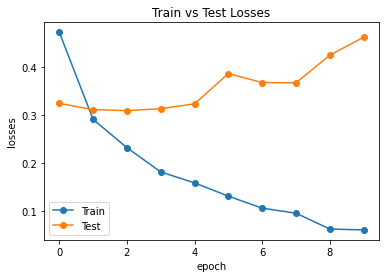

In [21]:
#plot losses

plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')

plt.show()

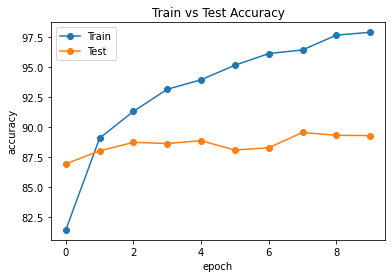

In [22]:
#plot accuracy

plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')

plt.show()